In [2]:
from load_neural_activity import pick_worm, load_dataset
from visualization.plot_worm_data import plot_worm_data
import numpy as np

## Real (experimental) data.

We have obtained "whole brain" calcium imaging data from several open source datasets. 


|Paper Link             |Database Link     |Files w/ Data          |Num. ID'd| 
|-----------------------|------------------|-----------------------|---------|
|tinyurl.com/Uzel2022   |osf.io/3vkxn/     |`Uzel_WT.mat`          |54/154   |
|tinyurl.com/Kaplan20   |osf.io/9nfhz/     |`Neuron2019_Data_*.mat`|48/103   |
|tinyurl.com/Nguyen17   |tinyurl.com/LeiferIEEE|`heatData*.mat`    |0/156    | 
|tinyurl.com/Skora2018  |osf.io/za3gt/     |`WT_*.mat`             |40/139   |
|tinyurl.com/Nichols2017|osf.io/kbf38/     |`*let.mat`             |35/116   |
|tinyurl.com/Kato2015   |osf.io/2395t/     |`WT_*Stim.mat`         |38/109   |


### Let's load some real C. elegans data.

dict_keys(['worm1', 'worm2'])


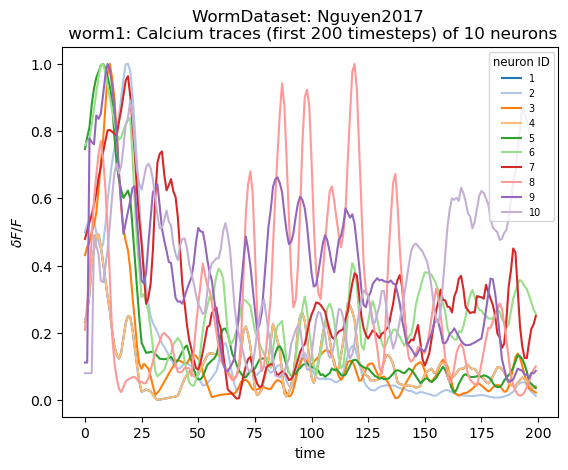

In [3]:
# @title Nguyen et al., PLOS CompBio 2017, _Automatically tracking neurons in a moving and deforming brain_
# @markdown Source: https://ieee-dataport.org/open-access/tracking-neurons-moving-and-deforming-brain-dataset

# load the dataset
Nguyen2017 = load_dataset("Nguyen2017")
print(Nguyen2017.keys())

# get data for one worm
worm = np.random.choice(list(Nguyen2017.keys()))
single_worm_dataset = pick_worm(Nguyen2017, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, "WormDataset: Nguyen2017 \n %s" % worm)

dict_keys(['worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12'])


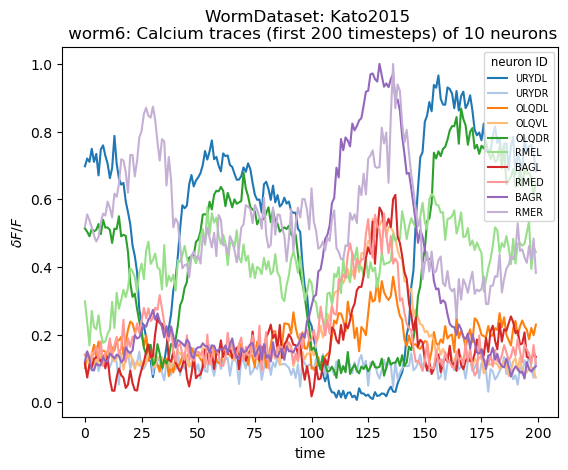

In [4]:
# @title Kato et al., Cell 2015, _Global Brain Dynamics Embed the Motor Command Sequence of Caenorhabditis elegans_
# @markdown Source: https://osf.io/2395t/

# load the dataset
Kato2015 = load_dataset("Kato2015")
print(Kato2015.keys())

# get data for one worm
worm = np.random.choice(list(Kato2015.keys()))
single_worm_dataset = pick_worm(Kato2015, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, "WormDataset: Kato2015 \n %s" % worm)

dict_keys(['worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44'])


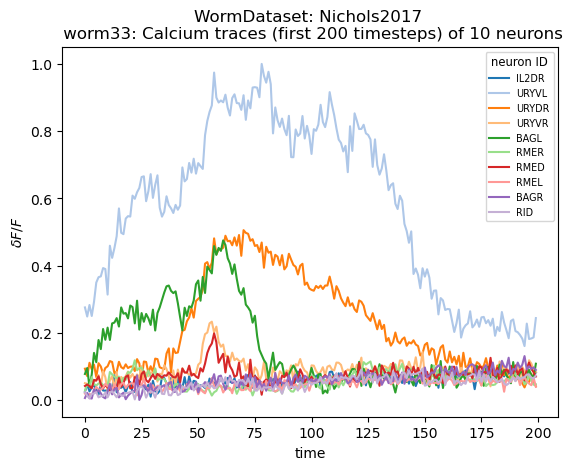

In [5]:
# @title Nichols et al., Science 2017, _A global brain state underlies C. elegans sleep behavior_
# @markdown Source: https://osf.io/kbf38/

# load the dataset
Nichols2017 = load_dataset("Nichols2017")
print(Nichols2017.keys())

# get data for one worm
worm = np.random.choice(list(Nichols2017.keys()))
single_worm_dataset = pick_worm(Nichols2017, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, "WormDataset: Nichols2017 \n %s" % worm)

dict_keys(['worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19'])


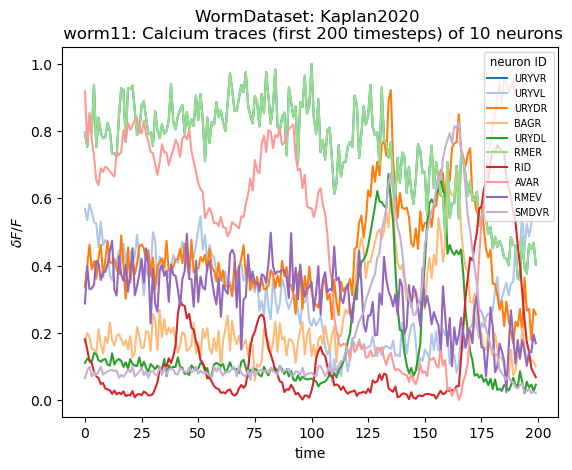

In [6]:
# @title Kaplan et al., Neuron 2020, _Nested Neuronal Dynamics Orchestrate a Behavioral Hierarchy across Timescales_
# @markdown Source: https://osf.io/9nfhz/

# load the dataset
Kaplan2020 = load_dataset("Kaplan2020")
print(Kaplan2020.keys())

# get data for one worm
worm = np.random.choice(list(Kaplan2020.keys()))
single_worm_dataset = pick_worm(Kaplan2020, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, "WormDataset: Kaplan2020 \n %s" % worm)

dict_keys(['worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6'])


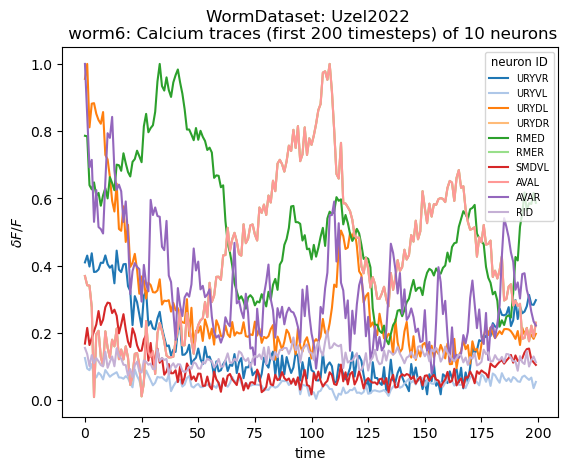

In [7]:
# @title Uzel et al., Cell CurrBio 2022, _A set of hub neurons and non-local connectivity features support global brain dynamics in C. elegans_
# @markdown Source: https://osf.io/3vkxn/

# # load the dataset
Uzel2022 = load_dataset("Uzel2022")
print(Uzel2022.keys())

# get data for one worm
worm = np.random.choice(list(Uzel2022.keys()))
single_worm_dataset = pick_worm(Uzel2022, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, "WormDataset: Uzel2022 \n %s" % worm)

dict_keys(['worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12'])


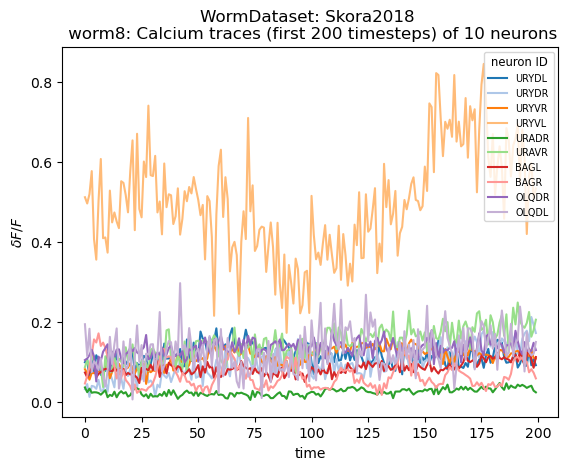

In [8]:
# @title Skora et al., Cell Reports 2018, _Energy Scarcity Promotes a Brain-wide Sleep State Modulated by Insulin Signaling in C. elegans_
# @markdown Source: https://osf.io/za3gt/

# # load the dataset
Skora2018 = load_dataset("Skora2018")
print(Skora2018.keys())

# get data for one worm
worm = np.random.choice(list(Skora2018.keys()))
single_worm_dataset = pick_worm(Skora2018, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, "WormDataset: Skora2018 \n %s" % worm)

### What's the distinction between "whole-brain" and "whole-nervous system" recordings? 

The nervous system of the C. elegans hermaphrodite is composed of 302 neurons that are organized in several 
ganglia in the head and tail and into a spinal cord-like ventral nerve cord [1]. The majority of the neurons 
is located in the head, where they are organised in a number of ganglia surrounding the pharynx, forming the 
brain of the animal [2].

References:
- [1] http://www.wormbook.org/chapters/www_specnervsys.2/neurogenesis.html<br>
- [2] https://www.sfu.ca/biology/faculty/hutter/hutterlab/research/Ce_nervous_system.html<br>

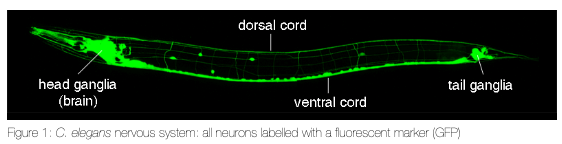

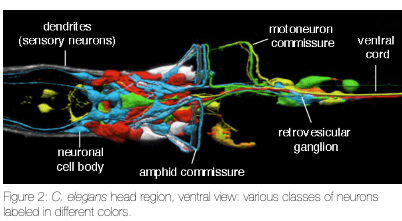